In [1]:
from maze_env.envs.mazelib import Maze
from maze_env.envs.generate.BacktrackingGenerator import BacktrackingGenerator
from maze_env.envs.solve.Collision import Collision
from maze_env.envs.solve.Chain import Chain
from maze_env.envs.solve.RandomMouse import RandomMouse
from maze_env.envs.solve.BacktrackingSolver import BacktrackingSolver
from maze_env.envs.solve.ShortestPath import ShortestPath
from maze_env.envs.solve.ShortestPaths import ShortestPaths
from maze_env.envs.solve.Tremaux import Tremaux
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [22]:
def showPNG(maze, point=None):
    """Generate a simple image of the maze."""
    plt.figure(figsize=(10, 5))
    plt.imshow(maze.grid, cmap=plt.cm.binary, interpolation='nearest', origin='upper')
    if maze.start:
        plt.scatter(x=maze.start[1], y=maze.start[0], c="red")
        plt.scatter(x=maze.end[1], y=maze.end[0], c="blue")
    if maze.solutions:
        sols = np.array(maze.solutions[0]).T
        plt.scatter(x=sols[1], y=sols[0], c="green", s=4)
    if isinstance(point, np.ndarray):
        plt.scatter(point[1], point[0], c="purple")
    plt.xticks([]), plt.yticks([])
    plt.show()

11


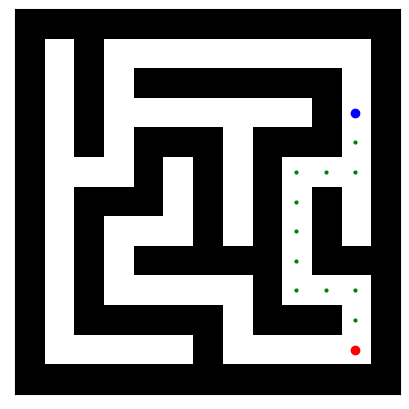

In [9]:
seed = 13
m = Maze(seed)
m.generator = BacktrackingGenerator(6,6)
m.generate()
m.generate_entrances(False, False)
m.solver = Collision()
m.solve()
print(len(m.solutions[0]))
showPNG(m)

In [8]:
len(m.grid)**2 - np.sum(m.grid)

127

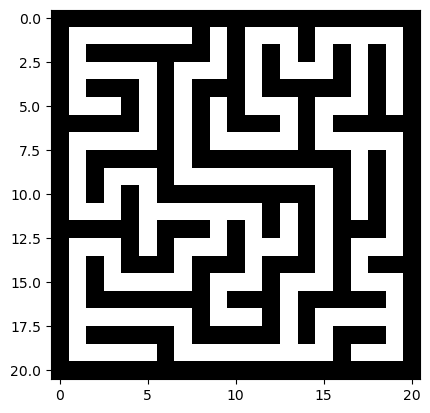

In [269]:
grid = (1-m.grid)*255
grid = grid[:,:,np.newaxis]
grid2 = np.concatenate((grid, grid, grid), axis=2)
plt.imshow(grid2)

(13, 11)


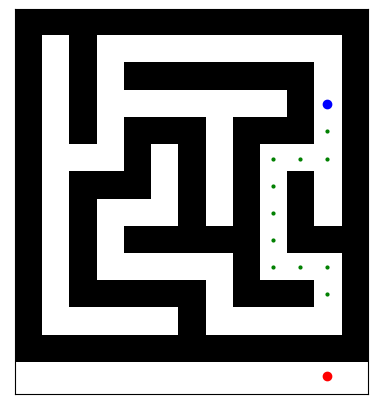

In [8]:
new_start = m.start + np.array([1,0])
m.start = tuple(new_start)
print(m.start)
showPNG(m)

In [140]:
legal_moves = []
agent_loc_r, agent_loc_c = m.start
# check if can move up
if m.grid[agent_loc_r-1, agent_loc_c] == 0:
    legal_moves += [0]
# down
if m.grid[agent_loc_r+1, agent_loc_c] == 0:
    legal_moves += [1]
# right
if m.grid[agent_loc_r, agent_loc_c+1] == 0:
    legal_moves += [2]
# left
if m.grid[agent_loc_r, agent_loc_c-1] == 0:
    legal_moves += [3]

In [141]:
agent_loc = np.zeros(m.grid.shape)
agent_loc[m.start] = 1
exit_loc = np.zeros(m.grid.shape)
exit_loc[m.end] = 1
b = np.array([m.grid, agent_loc, exit_loc])

In [27]:
m.start

(11, 11)

In [29]:
m.end

(3, 11)

In [6]:
m.solutions

[[(10, 11),
  (9, 11),
  (9, 10),
  (9, 9),
  (8, 9),
  (7, 9),
  (6, 9),
  (5, 9),
  (5, 10),
  (5, 11),
  (4, 11)]]

In [50]:
(11,4) in a

False

In [2]:
for i in range(10000):
    m = Maze(i)
    m.grid = np.ones((13,13))
    m.grid[1:-1,1:-1] = np.zeros((11,11))
    m.generate_entrances()
    
    #m.solver = ShortestPath()
    #m.solve()

    start_0, start_1 = m.start
    if (start_0 == 0 and start_1 == 0) or (start_0 == 12 and start_1 == 0) or (start_0 == 0 and start_1 == 12) or (start_0 == 12 and start_1 == 12):
        print(f"corner at seed: {i}")
        break

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


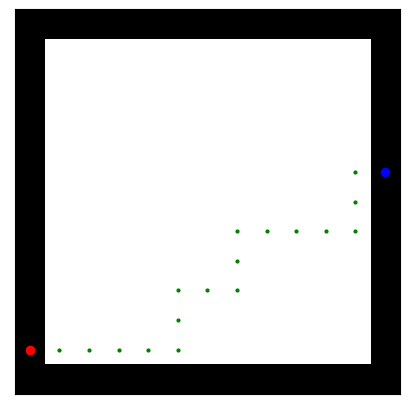

In [16]:
m = Maze(5)
m.grid = np.ones((13,13))
m.grid[1:-1,1:-1] = np.zeros((11,11))
m.generate_entrances()
m.solver = ShortestPath()
m.solve()
showPNG(m)

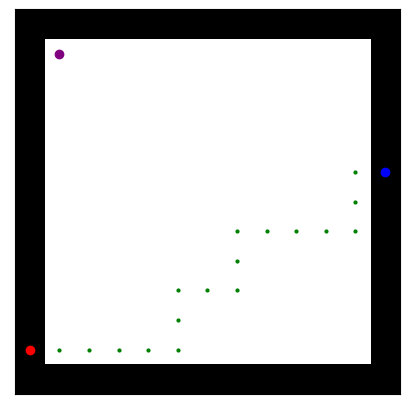

In [35]:
b = np.array(m.start)
c = np.array(m.end)
d = np.array([1,1])
showPNG(m, d)

In [30]:
(np.array(m.end)-np.array(d) == np.array([-1,0]))

array([False, False])

In [36]:
legal_moves = []
agent_loc_r, agent_loc_c = tuple(d)

# check if can move up (or its exit)
if (m.grid[agent_loc_r-1, agent_loc_c] == 0):
    legal_moves += [0]
# down
if (m.grid[agent_loc_r+1, agent_loc_c] == 0):
    legal_moves += [1]
# right
if (m.grid[agent_loc_r, agent_loc_c+1] == 0):
    legal_moves += [2]
# left
if (m.grid[agent_loc_r, agent_loc_c-1] == 0):
    legal_moves += [3]

In [37]:
legal_moves

[]

In [41]:
if (b == (0 or m.grid.shape[0]-1)) or (c == (0 or m.grid.shape[1]-1)):
    print("y")
else:
    print("n")

n


In [46]:
m.grid[b,c]

IndexError: index 13 is out of bounds for axis 1 with size 13